In [1]:
import pandas as pd

In [41]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xgboost as xg
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.stats import shapiro, levene, mannwhitneyu
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

In [4]:
df = pd.read_csv('C:/Users/aishw/Documents/mtechsem1/datamininglab/course_project1/archive/the weather of 155 countries in 2020.csv')

C:\Users\aishw\AppData\Local\Temp\ipykernel_9080\3978436574.py:1: DtypeWarning: Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/aishw/Documents/mtechsem1/datamininglab/course_project1/archive/the weather of 155 countries in 2020.csv')


In [5]:
df.shape

(1026119, 23)

In [6]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [7]:
df.describe()


,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1026119.0,1.026119e+06,1.026119e+06,718382.000000,214350.000000,789773.000000,652635.000000,680160.000000,103991.000000,102307.000000,102307.000000,102307.000000,1263.00000,81.000000,2.000000
mean,2020.0,4.270895e+00,1.591416e+01,2.709079,152.122871,14.243602,17.513628,7.148537,3.793184,37.785974,73.215435,797.540204,5.33175,0.958025,0.050000
std,0.0,1.808793e+00,8.764367e+00,8.737303,301.263596,13.321644,13.455482,13.197662,19.216583,11.690114,71.593997,1103.566712,7.19394,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000,0.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.00000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000,0.000000,5.800000,8.100000,-0.600000,0.000000,30.533000,80.083000,68.000000,2.00000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000,0.000000,16.200000,19.000000,8.300000,0.000000,38.233000,105.183000,266.000000,3.00000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000,221.000000,25.400000,28.400000,17.000000,0.000000,45.283000,116.333000,1099.000000,5.00000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,447.000000,52900.000000,42.900000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.00000,9.240000,0.100000


In [8]:
df.isna().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                307737
SNWD                811769
TAVG                236346
TMAX                373484
TMIN                345959
SNOW                922128
LATITUDE            923812
LONGITUDE           923812
ELEVATION           923812
PRCP_ATTRIBUTES    1020112
TAVG_ATTRIBUTES    1022269
TMAX_ATTRIBUTES    1020482
TMIN_ATTRIBUTES    1020245
DAPR               1024856
MDPR               1026038
WESD               1026117
SNWD_ATTRIBUTES    1025765
dtype: int64

            Year         Month           Day           PRCP           SNWD   
count  1026119.0  1.026119e+06  1.026119e+06  718382.000000  214350.000000  \
mean      2020.0  4.270895e+00  1.591416e+01       2.709079     152.122871   
std          0.0  1.808793e+00  8.764367e+00       8.737303     301.263596   
min       2020.0  1.000000e+00  1.000000e+00       0.000000       0.000000   
25%       2020.0  3.000000e+00  8.000000e+00       0.000000       0.000000   
50%       2020.0  4.000000e+00  1.600000e+01       0.000000       0.000000   
75%       2020.0  6.000000e+00  2.400000e+01       1.500000     221.000000   
max       2020.0  7.000000e+00  3.100000e+01     447.000000   52900.000000   

                TAVG           TMAX           TMIN           SNOW   
count  789773.000000  652635.000000  680160.000000  103991.000000  \
mean       14.243602      17.513628       7.148537       3.793184   
std        13.321644      13.455482      13.197662      19.216583   
min       -56.200000 

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'PRCP'}>],
       [<Axes: title={'center': 'SNWD'}>,
        <Axes: title={'center': 'TAVG'}>,
        <Axes: title={'center': 'TMAX'}>,
        <Axes: title={'center': 'TMIN'}>],
       [<Axes: title={'center': 'SNOW'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'ELEVATION'}>],
       [<Axes: title={'center': 'DAPR'}>,
        <Axes: title={'center': 'MDPR'}>,
        <Axes: title={'center': 'WESD'}>, <Axes: >]], dtype=object)

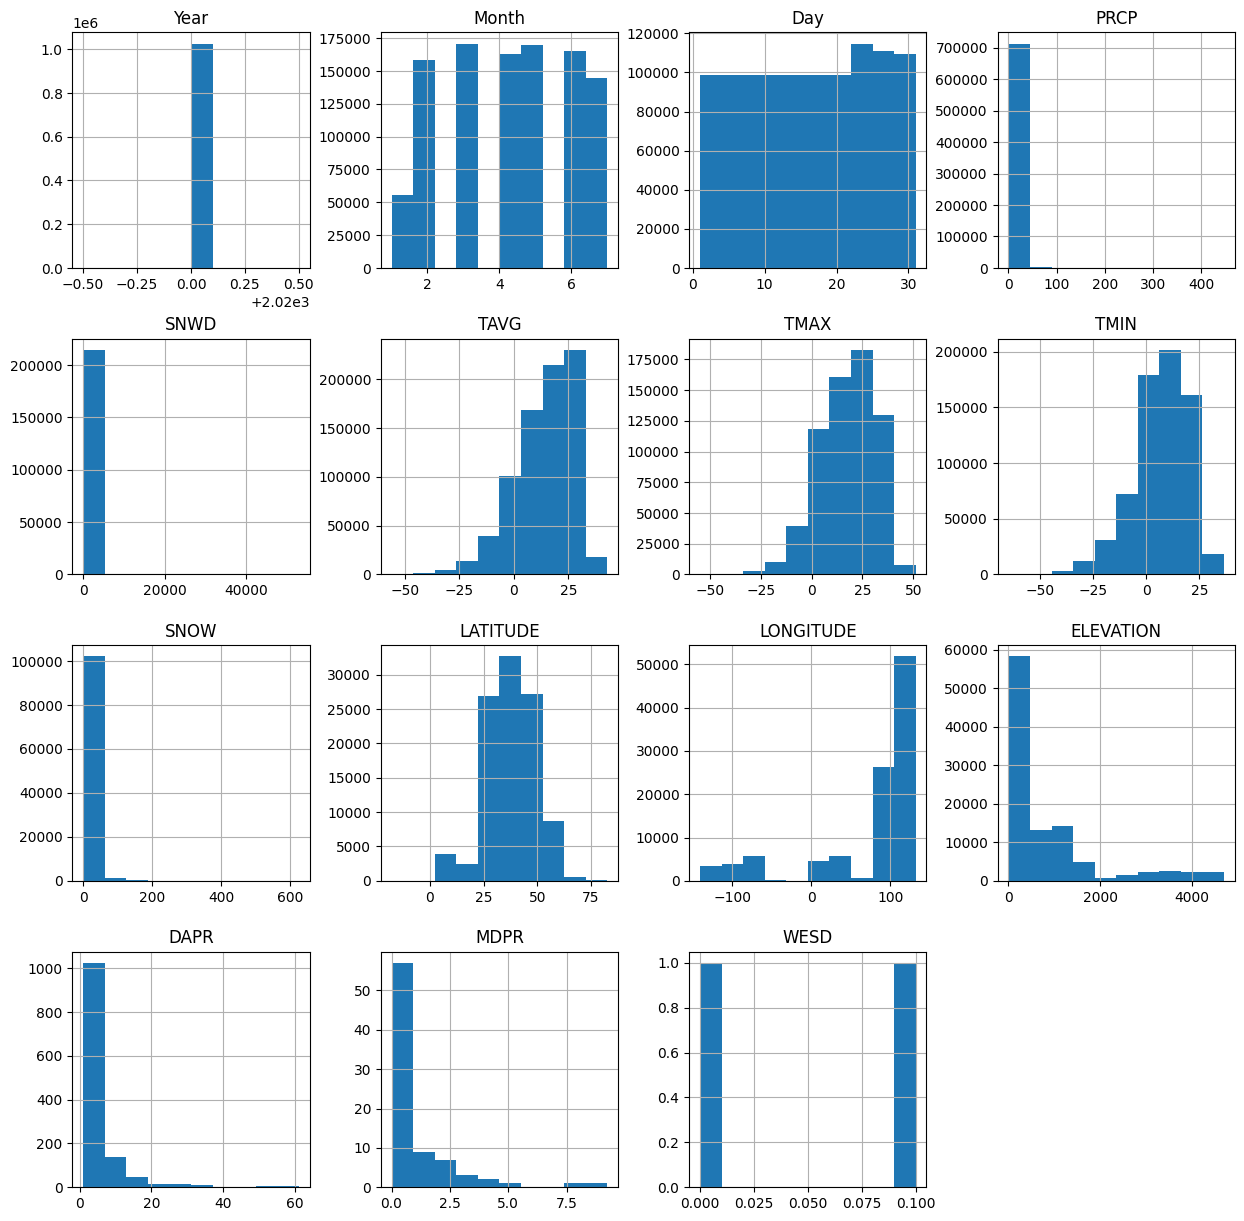

In [9]:
# Summary statistics
print(df.describe())

# Histograms
df.hist(figsize=(15,15))

<Axes: title={'center': 'Top 20 Countries with Highest Average Temperature'}, xlabel='Country/Region'>

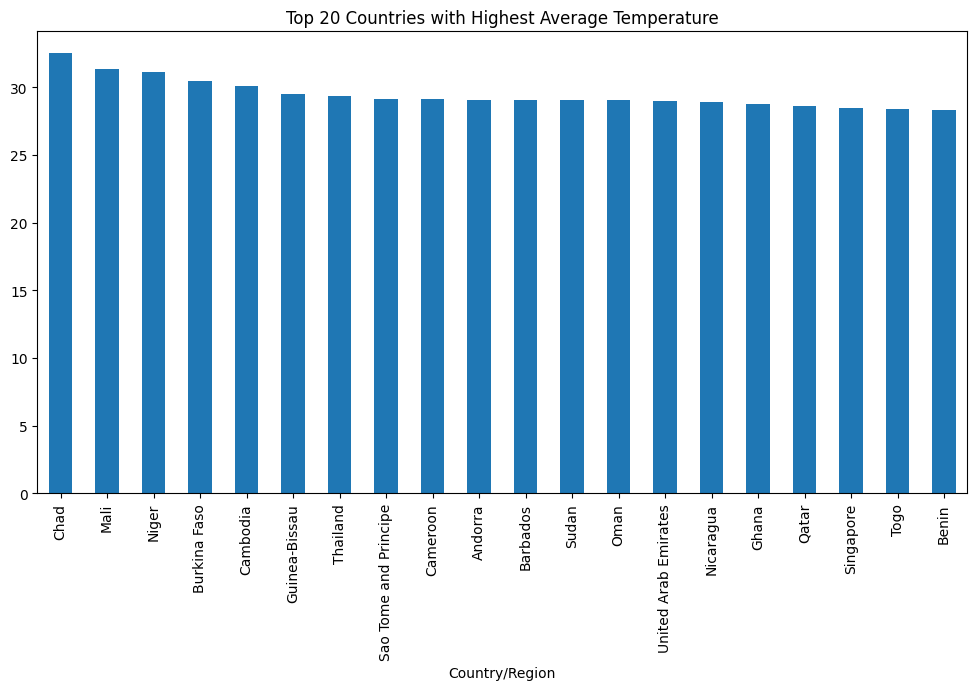

In [37]:
mean_temp_per_country = df.groupby('Country/Region')['TAVG'].mean().sort_values(ascending=False)

countries_temp = mean_temp_per_country.head(20)

# Plot the results
countries_temp.plot(kind='bar', figsize=(12,6), title='Top 20 Countries with Highest Average Temperature')

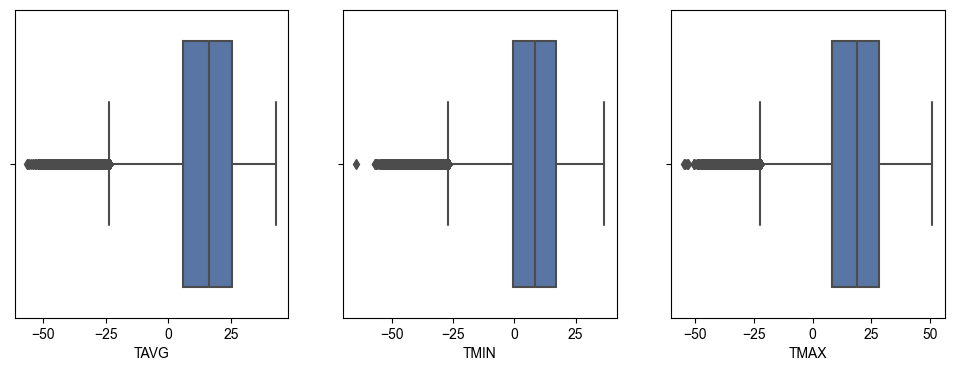

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["TAVG", "TMIN", "TMAX"]):
    sns.boxplot(x=df[col], ax=ax[axid])

### Taking care of NULL values

In [11]:
df = df.drop(columns=df.columns[11:], axis=1)

df.isna().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP              307737
SNWD              811769
TAVG              236346
TMAX              373484
TMIN              345959
dtype: int64

In [13]:
df.isna().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP              307737
SNWD              811769
TAVG              236346
TMAX              373484
TMIN              345959
dtype: int64

### Predicting average temperature for a specific country

In [17]:
canada_df = df[df['Country/Region'] == 'Canada']
canada_df.isna().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   0
Month                  0
Day                    0
PRCP               26896
SNWD              157283
TAVG               99090
TMAX               90022
TMIN               90088
dtype: int64

In [21]:
canada_df = canada_df.drop(columns=['SNWD'])
canada_df.isna().sum()

STATION               0
Country/Region        0
DATE                  0
Year                  0
Month                 0
Day                   0
PRCP              26896
TAVG              99090
TMAX              90022
TMIN              90088
dtype: int64

In [27]:
canada_df = canada_df.dropna()
canada_df.isna().sum()

STATION           0
Country/Region    0
DATE              0
Year              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

### Linear Regression

In [34]:
# Define independent and dependent variables
X = canada_df[['Day','Month', 'TMAX', 'TMIN', 'PRCP']]
y = canada_df['TAVG']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = LinearRegression(copy_X=False, fit_intercept=False, positive=False)
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

    


0.047894791323230296 0.9996785620465497


### XGBoost Regressor

In [38]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 23)
  
xgb_r.fit(X_train, y_train)
  
pred = xgb_r.predict(X_test)
  
rmse = np.sqrt(MSE(y_test, pred))
r2 = r2_score(y_test,pred)
print(f'RMSE: {rmse}, r2: {r2}')

RMSE: 0.5007691108249143, r2: 0.9983170007074722


C:\Users\aishw\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [13:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


### Ridge Regression Model

In [39]:
ridge_model = Ridge(alpha=0.1)
  
# Fitting the model
ridge_model.fit(X_train, y_train)
  
# Predict the model
pred = ridge_model.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
r2 = r2_score(y_test,pred)
print(f'RMSE: {rmse}, r2: {r2}')

RMSE: 0.21885986433160723, r2: 0.9996785295040147
